# Dan Crouthamel – SMU NLP Course — Homework 6

## Assignment Objectives

1. Evaluate text similarity of Amazon book search results by doing the following.

  - Do a book search on Amazon. Manually copy the full book title (including subtitle) of each of the top 24 books listed in the first two pages of search results.  

  - In Python, run one of the text-similarity measures covered in this course, e.g., cosine similarity. Compare each of the book titles, pairwise, to every other one.

  - Which two titles are the most similar to each other? Which are the most dissimilar? Where do they rank, among the first 24 results?

2. Now evaluate using a major search engine:

  - Enter one of the book titles from question 1a into Google, Bing, or Yahoo!. Copy the capsule of the first organic result and the 20th organic result. Take web results only (i.e., not video results), and skip sponsored results.

  - Run the same text similarity calculation that you used for question 1b on each of these capsules in comparison to the original query (book title).

  - Which one has the highest similarity measure?

Submit all of your inputs and outputs and your code for this assignment, along with a brief written explanation of your findings.

## Solution

### Library Imports

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### Question 1

I decided to do an Amazon Search on "UFO Ancient Civilizations". I'm convinced all life on this planet was genetically engineered by people similar to us, but were mistaken to be "Gods" because the people did not understand their technology at the time. More importantly, people are the result of a genetic experiment that took place on this planet a long time ago. Check out Ancient Civilizations on Gaia. It will blow your mind!


In [2]:
book_titles = ["Forgotten Civilization: New Discoveries on the Solar-Induced Dark Age",
      "Hidden History: Ancient Aliens and the Suppressed Origins of Civilization",
      "Lost Civilizations: The Secret Histories and Suppressed Technologies of the Ancients",
      "Ancient Aliens: The Official Companion Book",
      "The Disinformation Guide to Ancient Aliens, Lost Civilizations, Astonishing Archaeology and Hidden History",
      "The Lost Book of Enki: Memoirs and Prophecies of an Extraterrestrial God",
      "The Wars of Gods and Men (Earth Chronicles)",
      "Weapons of the Gods: How Ancient Alien Civilizations Almost Destroyed the Earth",
      "Ancient Gods: Lost Histories, Hidden Truths, and the Conspiracy of Silence",
      "Our Occulted History: Do the Global Elite Conceal Ancient Aliens?",
      "Chariots of the Gods",
      "Exploring The Moon: Going Back Clears Up Many Anomalies Like UFOs, Ancient Civilizations, And More: Life On Venus And Mars",
      "Death on Mars: The Discovery of a Planetary Nuclear Massacre",
      "Twelfth Planet: Book I of the Earth Chronicles (The Earth Chronicles)",
      "Hidden Realms, Lost Civilizations, and Beings from Other Worlds",
      "Ancient Aliens on the Moon",
      "Forgotten Civilization: The Role of Solar Outbursts in Our Past and Future",
      "UNLOCKING THE DREAM VISION: The Secret History of Creation",
      "Ancient Aliens in the Bible: Evidence of UFOs, Nephilim, and the True Face of Angels in Ancient Scriptures",
      "Cataclysm!: Compelling Evidence of a Cosmic Catastrophe in 9500 B.C.",
      "Zecharia Sitchin and the Extraterrestrial Origins of Humanity",
      "The Anunnaki Connection: Sumerian Gods, Alien DNA, and the Fate of Humanity (From Eden to Armageddon)",
      "The Secret Book of Dzyan: Unveiling the Hidden Truth about the Oldest Manuscript in the World and Its Divine Authors (Sacred Wisdom)",
      "Wars of the Anunnaki: Nuclear Self-Destruction in Ancient Sumer"
     ]

# Verify we have 24 books
print(len(book_titles))

24


Next we'll use the CountVectorizer class to encode our book titles into vectors. This will produce k vectors in n dimensional space, where k is the number of book titles and n is the number of unique words across all those book titles.

Notice the parameters we pass. We are specifying that stop words be removed and the words be converted to lower case.

In [3]:
vectorizer = CountVectorizer(stop_words='english', lowercase=True)
matrix = vectorizer.fit_transform(book_titles)
vectors = matrix.toarray()
print(vectorizer.get_feature_names())
print(vectors.shape)

['9500', 'age', 'alien', 'aliens', 'ancient', 'ancients', 'angels', 'anomalies', 'anunnaki', 'archaeology', 'armageddon', 'astonishing', 'authors', 'beings', 'bible', 'book', 'cataclysm', 'catastrophe', 'chariots', 'chronicles', 'civilization', 'civilizations', 'clears', 'companion', 'compelling', 'conceal', 'connection', 'conspiracy', 'cosmic', 'creation', 'dark', 'death', 'destroyed', 'destruction', 'discoveries', 'discovery', 'disinformation', 'divine', 'dna', 'dream', 'dzyan', 'earth', 'eden', 'elite', 'enki', 'evidence', 'exploring', 'extraterrestrial', 'face', 'fate', 'forgotten', 'future', 'global', 'god', 'gods', 'going', 'guide', 'hidden', 'histories', 'history', 'humanity', 'induced', 'life', 'like', 'lost', 'manuscript', 'mars', 'massacre', 'memoirs', 'men', 'moon', 'nephilim', 'new', 'nuclear', 'occulted', 'official', 'oldest', 'origins', 'outbursts', 'past', 'planet', 'planetary', 'prophecies', 'realms', 'role', 'sacred', 'scriptures', 'secret', 'self', 'silence', 'sitchin

Above we print out the feature names, which are just the unique words across all book titles. We see that the shape is 24 x 111, which indicates we have 111 unique words.

Below we will compute the cosine simiarity and output the vectors for the first two books.

In [4]:
#Cosine similarity for book titles
cos_similarity = cosine_similarity(vectors)

#Examine the first two titles of the matrix
cos_similarity[:2,:]

array([[1.        , 0.13363062, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.40089186, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.13363062, 1.        , 0.14285714, 0.3380617 , 0.47809144,
        0.        , 0.        , 0.14285714, 0.26726124, 0.42857143,
        0.        , 0.10910895, 0.        , 0.        , 0.15430335,
        0.43643578, 0.14285714, 0.15430335, 0.31448545, 0.        ,
        0.16903085, 0.        , 0.10482848, 0.14285714]])

Next we'll generate a heatmap to better visualize which titles are more closely related. 

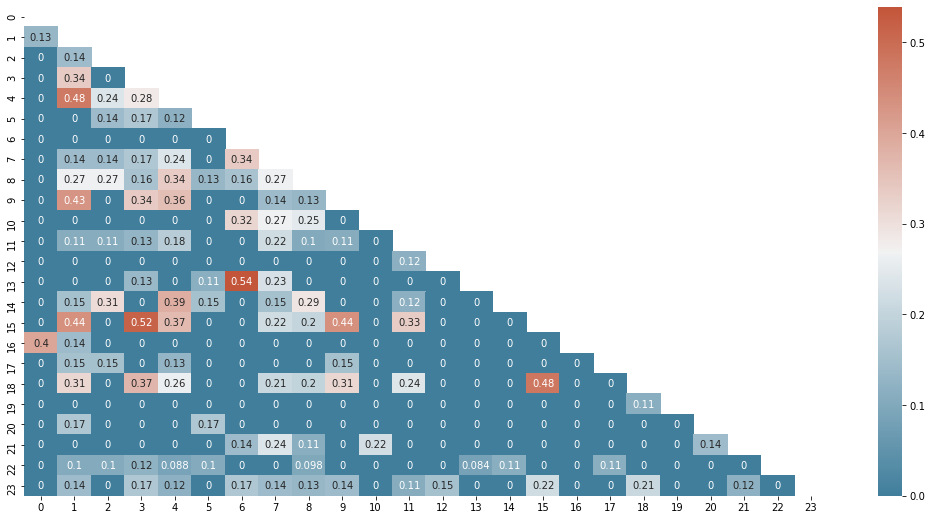

In [5]:
# Generate a mask for the upper triangle
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
mask = np.triu(np.ones_like(cos_similarity, dtype=bool))

f, ax = plt.subplots(figsize=(18,9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(cos_similarity, mask=mask, cmap=cmap, annot=True)

plt.show()

Above we see that the books with index 13 and 6 have the highest similarity, with a score of 0.54. The output below shows the titles, and I can see why these two books would be closely related. The word "Chronicles" is common. Both of these books are by the same author.

In [6]:
print("\nTitle 13:\n", book_titles[13],"\nTitle 6: \n", book_titles[6])


Title 13:
 Twelfth Planet: Book I of the Earth Chronicles (The Earth Chronicles) 
Title 6: 
 The Wars of Gods and Men (Earth Chronicles)


As for which pair is less similar, that's hard to say. We have many with a score of 0, but that would make sense if they don't share the same set of words.

### Question 2

For question 2, I'll search for the first book title using Bing. I'm using the entire text from the capsules returned, not the title.

In [7]:
book = "Forgotten Civilization: New Discoveries on the Solar-Induced Dark Age"

first_result = "Reveals how solar outbursts caused the end of the last ice age, unleashed catastrophe upon ancient advanced civilizations, and led to six millennia of a Solar-Induced Dark Age. Includes evidence from solar science, geology, oceanic circulation patterns, the Sphinx, the underground cities of Cappadocia, the Easter Island rongorongo glyphs, and the Göbekli Tepe complex in Turkey"

last_result = "Booktopia has Forgotten Civilization, New Discoveries on the Solar-Induced Dark Age by Robert M. Schoch. Buy a discounted Paperback of Forgotten Civilization online from Australia's leading online bookstore."

results = [book, first_result, last_result]

vectorizer = CountVectorizer(stop_words='english', lowercase=True)
matrix = vectorizer.fit_transform(results)
vectors = matrix.toarray()
print(vectorizer.get_feature_names())
print(vectors.shape)

['advanced', 'age', 'ancient', 'australia', 'bookstore', 'booktopia', 'buy', 'cappadocia', 'catastrophe', 'caused', 'circulation', 'cities', 'civilization', 'civilizations', 'complex', 'dark', 'discounted', 'discoveries', 'easter', 'end', 'evidence', 'forgotten', 'geology', 'glyphs', 'göbekli', 'ice', 'includes', 'induced', 'island', 'leading', 'led', 'millennia', 'new', 'oceanic', 'online', 'outbursts', 'paperback', 'patterns', 'reveals', 'robert', 'rongorongo', 'schoch', 'science', 'solar', 'sphinx', 'tepe', 'turkey', 'underground', 'unleashed']
(3, 49)


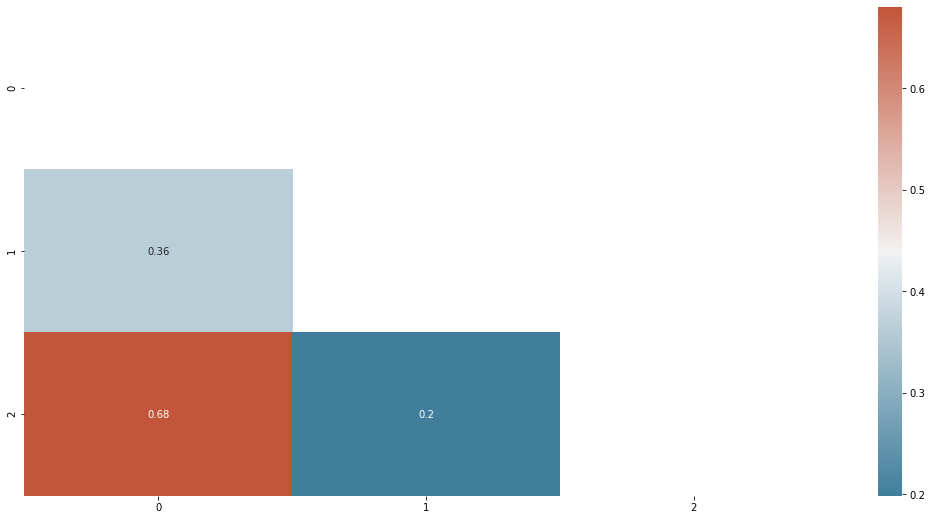

In [8]:
cos_similarity = cosine_similarity(vectors)

mask = np.triu(np.ones_like(cos_similarity, dtype=bool))

f, ax = plt.subplots(figsize=(18,9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(cos_similarity, mask=mask, cmap=cmap, annot=True)

plt.show()

Above we see that the last result, and not the first result is more similar. That is, 0.68 vs 0.36. The first result returned a lot more words than just the title, so that could explain why it is less similar. The last result was on par with the first in terms of words and the number of words.